In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

import pycountry

from glob import glob

/home/rodolfo/anaconda3/envs/estudo/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Carregar dados

Dataset disponível em:

https://worldhappiness.report/ed/2024/#appendices-and-data


In [2]:
files=glob('../dados/archive/*.xls')
files

['../dados/archive/2024.xls', '../dados/archive/2008-2023.xls']

In [3]:
report_2024      =pd.read_excel('../dados/archive/2024.xls')
reports_2008_2023=pd.read_excel( '../dados/archive/2008-2023.xls')

In [4]:
#O report de 2024 conta com os dados somente para o índice de felicidade
report_2024.head()

,Country name,Ladder score
0,Finland,7.7407
1,Denmark,7.5827
2,Iceland,7.5251
3,Sweden,7.3441
4,Israel,7.3411


In [5]:
#Os reports de 2008 a 2023 contam com os indicadores
reports_2008_2023.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.164055,0.881686,0.414297,0.258195
1,Afghanistan,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.187297,0.850035,0.481421,0.237092
2,Afghanistan,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.117861,0.706766,0.516907,0.275324
3,Afghanistan,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.160098,0.731109,0.479835,0.267175
4,Afghanistan,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.234157,0.775620,0.613513,0.267919


In [6]:
#o indicie de felicidade no report de 2024 é chamado de Ladder score e nos demais de Life Ladder	
# report de 2024 na conta com coluna com o ano
report_2024['year']=2024
report_2024.rename(columns={'Ladder score':'Life Ladder'},inplace=True)

In [7]:
##Concatenando os reports
report=pd.concat([reports_2008_2023,report_2024],axis=0)

In [8]:
report.sort_values(by=['Country name','year'],ascending=True,inplace=True)

In [9]:
report.head(20)

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.164055,0.881686,0.414297,0.258195
1,Afghanistan,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.187297,0.850035,0.481421,0.237092
2,Afghanistan,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.117861,0.706766,0.516907,0.275324
3,Afghanistan,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.160098,0.731109,0.479835,0.267175
4,Afghanistan,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.234157,0.775620,0.613513,0.267919
5,Afghanistan,2013,3.572100,7.680333,0.483552,52.000000,0.577955,0.059246,0.823204,0.547417,0.273328
6,Afghanistan,2014,3.130896,7.670638,0.525568,52.299999,0.508514,0.102330,0.871242,0.491641,0.374861
7,Afghanistan,2015,3.982855,7.653833,0.528597,52.599998,0.388928,0.078218,0.880638,0.491410,0.339276
8,Afghanistan,2016,4.220169,7.650370,0.559072,52.924999,0.522566,0.040480,0.793246,0.501409,0.348332
9,Afghanistan,2017,2.661718,7.647830,0.490880,53.250000,0.427011,-0.122848,0.954393,0.435270,0.371326


Helliwell, J. F., Layard, R., Sachs, J. D., De Neve, J.-E., Aknin, L. B., & Wang, S. (Eds.). (2024). World Happiness Report 2024. University of Oxford: Wellbeing Research Centre.

# Descrição dos dados

O dataset contém reports sobre o nível de felicidade em 155 países entre os anos de 2015 e 2024. O nível de felicidade foi medido em uma pesquisa em que pessoas eram solicitadas a dar uma nota para suas pŕoprias vidas, na qual 10 seria o melhor cenário possível e 0 o pior. Os reports contam com o score de felicidade obtido por cada país, além de 9 indicadores que podem ser usados para explicar o índice de felicidade. As definições das variáveis são apresentadas a seguir:

- Happiness score or subjective well-being (variable name ladder): Essa variável contém a média das repostas em cada país para a seguinte questão: Imagine uma escada com degraus numerados de 0 a 10. O topo da escada está com o número dez e representa o melhor cenário possível para a sua vida, enquanto o primeiro degrau está numerado com 0 e representa o pior cenário possível. Em qual degrau o você se colocaria nesse momento?

- GDP per capita : PIB per capita em poder de compra pareado considerando preços contantes em dólar em 2017; 

- Social support é a média nacional das repostas para a seguinte  pergunta: Em caso de dificuldades, você conta com familiares ou amigos que possam te ajudar (1 em caso positivo e 0 caso contrário)? 

- Healthy life expectancy é a expectativa de vida;	

- Freedom to make life choices é a média nacional das repostas para a seguinte pergunta: Você está safisfeito com a liberdade que possui para fazer escolhas na sua vida (1 em caso positivo e 0 caso contrário) ?;
 
- Generosity é o resíduo da regressão entre GDP per capita e a resposta média para a seguinte pergunta: Você doou dinheiro para caridade no mês passado?;

- Perceptions of corruption é a média das respostas para duas perguntas. A primeira delas é se a corrupção está disseminada no governo e a segunda se a corrupção está disseminada no mundo empresarial.;

- Positive affect é defindo como a média de para três medidas: sorriso, prazer e prática de atividades interessantes. Essas três medidas são mensuradas através das repostas para três perguntas, referentes a experiência dessas três sensações durante boa parte do dia anterior:
    1) Você riu ou sorriu muito ontem?
    2) Você desfrutou  de sensações prazerosas no dia de ontem?
    3) Você aprendeu ou realizou alguma atividade interessante ontem?

- Negative affect é defindo como a média de para três medidas: preucupação, tristeza e raiva. Essas três medidas são mensuradas através das repostas para três perguntas, referentes a experiência dessas três sensações durante boa parte do dia anterior:
    1) Você se sentiu preucupado durante boa parte de onte?
    2) Você se sentiu triste durante boa parte de ontem?
    3) Você sentiu raiva durante boa parte de ontem?


# Análise dos Indicadores

## Análise Preliminar

In [10]:
report.head(10)

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.164055,0.881686,0.414297,0.258195
1,Afghanistan,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.187297,0.850035,0.481421,0.237092
2,Afghanistan,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.117861,0.706766,0.516907,0.275324
3,Afghanistan,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.160098,0.731109,0.479835,0.267175
4,Afghanistan,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.234157,0.775620,0.613513,0.267919
5,Afghanistan,2013,3.572100,7.680333,0.483552,52.000000,0.577955,0.059246,0.823204,0.547417,0.273328
6,Afghanistan,2014,3.130896,7.670638,0.525568,52.299999,0.508514,0.102330,0.871242,0.491641,0.374861
7,Afghanistan,2015,3.982855,7.653833,0.528597,52.599998,0.388928,0.078218,0.880638,0.491410,0.339276
8,Afghanistan,2016,4.220169,7.650370,0.559072,52.924999,0.522566,0.040480,0.793246,0.501409,0.348332
9,Afghanistan,2017,2.661718,7.647830,0.490880,53.250000,0.427011,-0.122848,0.954393,0.435270,0.371326


In [11]:
report.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2506 entries, 0 to 137
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      2506 non-null   object 
 1   year                              2506 non-null   int64  
 2   Life Ladder                       2506 non-null   float64
 3   Log GDP per capita                2335 non-null   float64
 4   Social support                    2350 non-null   float64
 5   Healthy life expectancy at birth  2300 non-null   float64
 6   Freedom to make life choices      2327 non-null   float64
 7   Generosity                        2282 non-null   float64
 8   Perceptions of corruption         2238 non-null   float64
 9   Positive affect                   2339 non-null   float64
 10  Negative affect                   2347 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 234.9+ KB


In [12]:
#Contagem do número de valores nulos para cada indicador
report.isnull().sum()

Country name                          0
year                                  0
Life Ladder                           0
Log GDP per capita                  171
Social support                      156
Healthy life expectancy at birth    206
Freedom to make life choices        179
Generosity                          224
Perceptions of corruption           268
Positive affect                     167
Negative affect                     159
dtype: int64

In [13]:
report.describe()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
count,2506.000000,2506.000000,2335.000000,2350.000000,2300.000000,2327.000000,2282.000000,2238.000000,2339.000000,2347.000000
mean,2015.290902,5.486074,9.399673,0.809369,63.401828,0.750290,0.000096,0.743959,0.651878,0.273160
std,5.359899,1.127954,1.152062,0.121211,6.842644,0.139366,0.161386,0.184871,0.106249,0.087133
min,2005.000000,1.281271,5.526723,0.228217,6.720000,0.228301,-0.339547,0.035198,0.178886,0.082737
25%,2011.000000,4.648161,8.506165,0.743811,59.195001,0.660706,-0.111940,0.686784,0.571977,0.208559
50%,2015.000000,5.462700,9.502946,0.834395,65.099998,0.771122,-0.021613,0.798497,0.663420,0.262175
75%,2020.000000,6.329096,10.392974,0.903779,68.552502,0.861740,0.093569,0.867557,0.737262,0.326211
max,2024.000000,8.018934,11.675588,0.987343,74.599998,0.985178,0.699570,0.983276,0.883586,0.704590


## Corrigindo problema da falta de dados

In [14]:
report['year'].unique()
#Os dados estão diponíveis para os anos compreendidos entre 2005 e 2024
#Porém nem todos os países tem os dados para todos os anos
#serão adicionadas linhas vazias para os países onde os dados para um certo ano não estejam dispoíveis
#no final o dataframe conterá o mesmo número de linhas para cada país, uma para cada um dos anos entre 2005 e 2024

#essa etapa é necessária para não gerar problemas na criação dos mapas (a ausência de dados para certos anos faz com que os anos não apareçam na ordem correta)

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
       2019, 2021, 2022, 2023, 2024, 2007, 2020, 2006, 2005])

In [15]:
empty_row=report.iloc[[0],:]
empty_row.loc[:,:]=np.nan #criação de uma linha somente com valores nulos

/tmp/ipykernel_5738/1357293007.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  empty_row.loc[:,:]=np.nan #criação de uma linha somente com valores nulos
/tmp/ipykernel_5738/1357293007.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  empty_row.loc[:,:]=np.nan #criação de uma linha somente com valores nulos


In [16]:
paises=report['Country name'].unique() #todos os países presentes no dataframe
anos=report['year'].unique()           #todos os anos presentes no dataframe

for pais in paises:
    for ano in anos:
        if ano not in report.loc[report['Country name']==pais,'year'].tolist():
            #caso as informações referentes a um anos nçao estejam presentes no dataframe, será adicionado ao df um linha vazia onde somente o nome do pais
            #e o ano são não nulos
            empty_row.loc[0,'Country name']=pais
            empty_row.loc[0,'year']=ano
            report=pd.concat([report,empty_row])

In [17]:
report['year']=report['year'].astype('int')
report.sort_values(by=["Country name",'year'],inplace=True)
report.reset_index(drop=True,inplace=True)

In [18]:
#Após a alteração cada pais no dataframe conta com uma linha para cada anos entre 2005 e 2024
report.head(20)

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,2006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,2007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.164055,0.881686,0.414297,0.258195
4,Afghanistan,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.187297,0.850035,0.481421,0.237092
5,Afghanistan,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.117861,0.706766,0.516907,0.275324
6,Afghanistan,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.160098,0.731109,0.479835,0.267175
7,Afghanistan,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.234157,0.775620,0.613513,0.267919
8,Afghanistan,2013,3.572100,7.680333,0.483552,52.000000,0.577955,0.059246,0.823204,0.547417,0.273328
9,Afghanistan,2014,3.130896,7.670638,0.525568,52.299999,0.508514,0.102330,0.871242,0.491641,0.374861


## Adição de uma coluna com ranking dos países mais felizes

Será adicionada uma coluna no dataframe com os países rankeados de acordo com os índices de felicidade.Esse ranking é anual e será contruído com base na coluna Life Ladder.
A coluna criada terá o nome Rank_Felicidade

In [19]:
nome_coluna_ranking='Rank_Felicidade'
report[nome_coluna_ranking]=np.nan
report.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Rank_Felicidade
0,Afghanistan,2005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,2006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,2007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.164055,0.881686,0.414297,0.258195,NaN
4,Afghanistan,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.187297,0.850035,0.481421,0.237092,NaN


In [20]:
years=report['year'].unique() #lista com os anos que estão no report
years
for year in years:
    ranking_anual=report.loc[report['year']==year,['Country name','Life Ladder']] #criação de um dataframe para gerar o ranking para um único ano
    ranking_anual['rank']=ranking_anual.loc[:,'Life Ladder'].rank(ascending=False)
    for pais in ranking_anual['Country name']: #adição dos ranking de cada ano no report
        report.loc[(report['Country name']==pais) & (report['year']==year),nome_coluna_ranking]=ranking_anual.loc[ranking_anual['Country name']==pais,'rank']


In [21]:
report

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Rank_Felicidade
0,Afghanistan,2005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,2006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,2007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.164055,0.881686,0.414297,0.258195,105.0
4,Afghanistan,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.187297,0.850035,0.481421,0.237092,96.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3315,Zimbabwe,2020,3.159802,7.596050,0.717243,53.575001,0.643303,0.002848,0.788523,0.660658,0.345736,115.0
3316,Zimbabwe,2021,3.154578,7.656878,0.685151,54.049999,0.667636,-0.079007,0.756945,0.609917,0.241682,119.0
3317,Zimbabwe,2022,3.296220,7.670073,0.666172,54.525002,0.651987,-0.072935,0.752632,0.640609,0.191350,135.0
3318,Zimbabwe,2023,3.572386,7.678590,0.693817,55.000000,0.734613,-0.068837,0.757494,0.609752,0.178953,132.0


## Dataframe com países rankeados de acordo com indicador selecionado

In [22]:
def dataframe_ranking(dados,num_paises,indicador,ranking='fp',coluna_anos='year',coluna_paises='Country name',
                      coluna_ranking_felicidade='Rank_Felicidade'):
    '''
    Função para cria um dataframe com os paises rankeardos de acordo um um indicador selecionado. O dataframe contará com um número de 
    países que deverá ser especificado. Também deverá ser selecionado se o dataframe conterá os n países com os maiores indicadores ou 
    n países com os piores indicadores

    inputs:
        dados      : pandas dataframe com os indicadores dos países
        num_paises : (int)número de países que constarão no dataframe que será criado
        indicador  : (str)indicador que será usado para contruir o ranking. Indicadores aceitos:  Life Ladder, Log GDP per capita, Social support, 
                    Healthy life expectancy at birth, Freedom to make life choices , Generosity, Perceptions of corruption, Positive affect,
                    Negative affect e Rank_Felicidade.
        ranking    : (str) fp correponde a first places. Se ranking=fp então será retornado um dataframe com os países melhores colocados
                    para o indicador selecionado. Caso lp (last places) serão retornados os piores
        coluna_anos: (str) coluna do dataframe on de estão registrados os anos dos reports
        coluna_paises: coluna no dataframe onde estão os nomes dos países
        coluna_ranking_felicidade: nome da coluna no dataframe com o ranking anual dos países considerando o score de felicidade

    outputs
        Pandas dataframe com os n países mcom os maiores ou menores valores para o indicador selecionado 
    '''
    top_indicador={}
    if indicador==coluna_ranking_felicidade: #se o indicador selecionado for o ranking de felicidade os países serão ordenados do
        crescente=True                       #menor indicador para o maior (1° aparece primeiro). Coso contrário do maior para o menor
    else:
        crescente=False
    
    if ranking=='fp': #se ranking=fp serção selecionados os melhores
        inicial,final,step=0,num_paises,1 #index usado no iloc
    else:
        inicial,final,step=-1,-num_paises-1,-1 #index do iloc. Negativos para selecionar a partir do final do dataframe 
    index_coluna_paises=dados.columns.to_list().index(coluna_paises) #index da coluna_paises para ser usado no iloc
    for year in dados[coluna_anos].unique():
        df=dados[dados[coluna_anos]==year].loc[:,[coluna_paises,indicador]].sort_values(by=indicador,ascending=crescente)
        df=df.dropna() #remover as linhas com valores nulas para que não entrem no ranking
        df=df.iloc[inicial:final:step,index_coluna_paises].to_list()
        if len(df)<num_paises: # preencher o ranking com valores nulos.Necessário caso dados não estejam disponíveis para a contrução do ranking
            df+=(num_paises-len(df))*[np.nan]
        top_indicador[year]=df
    top_indicador=pd.DataFrame.from_dict(top_indicador,orient='index')
    colunas=[str(i)+'°' for i in range(1,num_paises+1)]
    top_indicador.columns=colunas
    return top_indicador

In [23]:
#Ranking dos países mais felizes
ranking_mais_felizes=dataframe_ranking(report,10,'Life Ladder',ranking='fp')
ranking_mais_felizes

,1°,2°,3°,4°,5°,6°,7°,8°,9°,10°
2005,Denmark,Netherlands,Canada,Sweden,Australia,Belgium,Venezuela,Spain,France,Saudi Arabia
2006,Finland,Switzerland,Norway,New Zealand,United States,Israel,Ireland,Austria,Costa Rica,United Arab Emirates
2007,Denmark,New Zealand,United States,Canada,Netherlands,Costa Rica,Australia,Saudi Arabia,Sweden,Belgium
2008,Denmark,Finland,Norway,Netherlands,Ireland,Sweden,Canada,New Zealand,Spain,United States
2009,Denmark,Costa Rica,Switzerland,Canada,Israel,Sweden,Venezuela,United States,Ireland,Panama
2010,Denmark,Canada,Netherlands,Sweden,Venezuela,Australia,Finland,Israel,Panama,Austria
2011,Denmark,Netherlands,Austria,Israel,Canada,Australia,Sweden,Finland,Panama,Costa Rica
2012,Switzerland,Norway,Iceland,Sweden,Denmark,Netherlands,Finland,Canada,Austria,Mexico
2013,Canada,Denmark,Iceland,Austria,Finland,Mexico,Sweden,Netherlands,Australia,Israel
2014,Denmark,Switzerland,Norway,Israel,Finland,Netherlands,New Zealand,Canada,Australia,Costa Rica


In [24]:
#Ranking dos países menos felizes
ranking_menos_felizes=dataframe_ranking(report,10,'Life Ladder',ranking='lp')
ranking_menos_felizes

,1°,2°,3°,4°,5°,6°,7°,8°,9°,10°
2005,Türkiye,Romania,Egypt,Hungary,Pakistan,Iran,Lebanon,Poland,Greece,Jordan
2006,Togo,Benin,Chad,Cambodia,Sierra Leone,Georgia,Uganda,Niger,Haiti,Burkina Faso
2007,Zimbabwe,Sierra Leone,Liberia,Georgia,Bulgaria,Zambia,Burkina Faso,Chad,Mauritania,State of Palestine
2008,Togo,Sierra Leone,Zimbabwe,Burundi,Benin,Afghanistan,Congo (Brazzaville),Haiti,Burkina Faso,Kenya
2009,Tanzania,Comoros,Chad,Burundi,Georgia,Mali,Congo (Kinshasa),Rwanda,Zimbabwe,Cambodia
2010,Tanzania,Botswana,Central African Republic,Chad,Mali,Haiti,Comoros,Bulgaria,Sri Lanka,Burkina Faso
2011,Togo,Botswana,Central African Republic,Burundi,Yemen,Nepal,Afghanistan,Senegal,Comoros,Benin
2012,Syria,Benin,Rwanda,Madagascar,Guinea,Senegal,Afghanistan,Niger,Cambodia,Congo (Brazzaville)
2013,Syria,Burkina Faso,Rwanda,Benin,Chad,Egypt,Afghanistan,Senegal,South Africa,Cambodia
2014,Togo,Burundi,Afghanistan,Benin,Guinea,Chad,Burkina Faso,Tanzania,Ivory Coast,Rwanda


## Plotagem de Mapas

Serão criados mapas múndis onde cada país será colorido de acordo com o valor de um indicador escolhido.

Serão criados dois mapas:

- Mapa para um único indicador e ano;
- Mapa animado mostrando a evolução anual de um indicador selecionado.  

Para a criação dos mapas é necessária a adição de uma coluna no report com os códigos de cada país. Serão adicionados os códigos ISO 3166-1 alpha-3.

In [25]:
#Adicionando os códigos dos países nos reports para possibilitar a plotagem de mapas
#Os países serão identificados nos mapa pelos seus códigos

def gerar_codigo_pais(coluna):
    '''
    Função que gera o código do país a partir do seu nome. Esse códigos são necessários para a criação de mapas

    Inputs:
        Coluna de um pandas dataframe com nomes de países

    Outputs:
        Python list com os códigos dos países
    '''
    codigo=[]
    for nome_pais in coluna:
        try:
            codigo.append(pycountry.countries.get(name=nome_pais).alpha_3)
            #alpha_3 é para gerar um código de três letras
        except:
            codigo.append(None)
    return codigo
        

In [26]:
#Adicionando a coluna com o código do pais nos reports
report['Country_Code']=gerar_codigo_pais(report.loc[:,'Country name'])

In [27]:
report.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Rank_Felicidade,Country_Code
0,Afghanistan,2005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AFG
1,Afghanistan,2006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AFG
2,Afghanistan,2007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AFG
3,Afghanistan,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.164055,0.881686,0.414297,0.258195,105.0,AFG
4,Afghanistan,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.187297,0.850035,0.481421,0.237092,96.0,AFG


In [28]:
#O código não foi criado para alguns países
report.isnull().sum()

Country name                           0
year                                   0
Life Ladder                          814
Log GDP per capita                   985
Social support                       970
Healthy life expectancy at birth    1020
Freedom to make life choices         993
Generosity                          1038
Perceptions of corruption           1082
Positive affect                      981
Negative affect                      973
Rank_Felicidade                      814
Country_Code                         380
dtype: int64

In [29]:
report[report['Country_Code'].isnull()]

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Rank_Felicidade,Country_Code
320,Bolivia,2005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
321,Bolivia,2006,5.373986,8.670665,0.834280,60.900002,0.770135,-0.048467,0.794484,0.708094,0.431945,36.0,None
322,Bolivia,2007,5.628419,8.697795,0.796136,61.099998,0.779935,-0.003597,0.816994,0.745735,0.387786,38.0,None
323,Bolivia,2008,5.297873,8.740166,0.785262,61.299999,0.725620,-0.095964,0.801420,0.723478,0.392080,53.0,None
324,Bolivia,2009,6.085579,8.756054,0.831320,61.500000,0.778939,-0.040327,0.762605,0.742099,0.372369,33.0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3255,Vietnam,2020,5.462342,9.254416,0.764510,65.400002,0.944707,0.063276,0.791134,0.699165,0.286374,68.0,None
3256,Vietnam,2021,5.540250,9.271268,0.799494,65.500000,0.896800,0.104378,0.797788,0.650598,0.280437,70.0,None
3257,Vietnam,2022,6.266509,9.341064,0.878744,65.599998,0.975405,-0.182106,0.703423,0.774236,0.108473,40.0,None
3258,Vietnam,2023,6.325115,9.392351,0.844905,65.699997,0.955560,-0.159114,0.655275,0.710068,0.119510,44.0,None


In [30]:
#19 paises não tem código
report[report['Country_Code'].isnull()]['Country name'].nunique()

19

In [31]:
#Países para os quais os códigos não foram encontrados. 
paises_sem_codigo=report[report['Country_Code'].isnull()]['Country name'].unique()
paises_sem_codigo

array(['Bolivia', 'Congo (Brazzaville)', 'Congo (Kinshasa)',
       'Hong Kong S.A.R. of China', 'Iran', 'Ivory Coast', 'Kosovo',
       'Laos', 'Moldova', 'Russia', 'Somaliland region', 'South Korea',
       'State of Palestine', 'Syria', 'Taiwan Province of China',
       'Tanzania', 'Turkiye', 'Venezuela', 'Vietnam'], dtype=object)

Códigos dos países que aparecem nulos no report:

- Bolivia = BOL
- Congo (Brazzaville) é a República do Congo = COG
- Congo (Kinshasa) é e República Democrática do Congo = COD
- Hong Kong S.A.R. of China = HKG
- Iran = IRN
- Ivory Coast (Côte d'Ivoire) = CIV
- Kosovo (United Nations Interim Administration in Kosovo) = UNMIK
- Laos = LAO
- Moldova = MDA
- Russia = RUS
- Somaliland - pais não reconhecido, parte integrante da Somália
- South Korea = KOR
- State of Palestine = PSE
- Syria = SYR
- Taiwan Province of China = TWN
- Tanzania = TZA
- Turkiye = TUR
- Venezuela = VEN
- Vietnam = VNM



In [32]:
codigos_ausentes=['BOL','COG','COD','HKG','IRN','CIV','UNMIK','LAO','MDA','RUS',np.nan,'KOR','PSE','SYR','TWN','TZA','TUR','VEN','VNM']

In [33]:
for num, nome_pais in enumerate(paises_sem_codigo):
    report.loc[report['Country name']==nome_pais,'Country_Code']=codigos_ausentes[num]
    print(nome_pais)
    print(codigos_ausentes[num])
    print('')

Bolivia
BOL

Congo (Brazzaville)
COG

Congo (Kinshasa)
COD

Hong Kong S.A.R. of China
HKG

Iran
IRN

Ivory Coast
CIV

Kosovo
UNMIK

Laos
LAO

Moldova
MDA

Russia
RUS

Somaliland region
nan

South Korea
KOR

State of Palestine
PSE

Syria
SYR

Taiwan Province of China
TWN

Tanzania
TZA

Turkiye
TUR

Venezuela
VEN

Vietnam
VNM



In [34]:
#Restaram somente 4 entradas sem código para o pais
report.isnull().sum()

Country name                           0
year                                   0
Life Ladder                          814
Log GDP per capita                   985
Social support                       970
Healthy life expectancy at birth    1020
Freedom to make life choices         993
Generosity                          1038
Perceptions of corruption           1082
Positive affect                      981
Negative affect                      973
Rank_Felicidade                      814
Country_Code                          20
dtype: int64

In [35]:
#As 4 entradas sem código para os países são referentes a Somaliland region
report.loc[report['Country_Code'].isnull(),:]

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Rank_Felicidade,Country_Code
2640,Somaliland region,2005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2641,Somaliland region,2006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2642,Somaliland region,2007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2643,Somaliland region,2008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2644,Somaliland region,2009,4.991400,NaN,0.879567,NaN,0.746304,NaN,0.513372,0.707874,0.112012,74.0,NaN
2645,Somaliland region,2010,4.657363,NaN,0.829005,NaN,0.820182,NaN,0.471094,0.631947,0.083426,91.0,NaN
2646,Somaliland region,2011,4.930572,NaN,0.787962,NaN,0.858104,NaN,0.357341,0.690514,0.122244,90.0,NaN
2647,Somaliland region,2012,5.057314,NaN,0.786291,NaN,0.758219,NaN,0.333832,0.686732,0.152428,82.0,NaN
2648,Somaliland region,2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2649,Somaliland region,2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Mapas com indicadores para ano selecionado

In [36]:
report['year'].unique()

array([2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024])

In [37]:
report.columns

Index(['Country name', 'year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect',
       'Rank_Felicidade', 'Country_Code'],
      dtype='object')

Geração dos mapas:

- Os mapas podem ser gerados para os reports anuais. Os anos disponíveis estão entre 2018 e 2019;
- Os mapas podem ser gerados para os seguintes indicadores:

    - Life Ladder;
    - Log GDP per capita;	
    - Social support;
    - Healthy life expectancy at birth;
    - Freedom to make life choices;
    - Generosity;
    - Perceptions of corruption;
    - Positive affect;
    - Negative affect;
    - Rank_Felicidade


In [38]:
def gerar_mapa(dados,ano,indicador,column_ano='year',column_paises='Country name',column_codigos='Country_Code',projecao='natural earth'):
    '''
    Função para gerar o mapa mundi com cada país colorido de acordo com o valor do indicador selecionado

    dados          - (pandas dataframe) Dataframe com os dados
    ano            - (str) Ano do report entre 2015 e 2019. Refere-se ao ano dos indicadores.
    indicador      - (str) Indicador que será mostrado no mapa. Indicadores aceitos:  Life Ladder, Log GDP per capita, Social support, Healthy life expectancy at birth, 
                            Freedom to make life choices , Generosity, Perceptions of corruption, Positive affect,Negative affect e Ranking_Felicidade.
    column_ano     - (str) nome da coluna no dataframe dados onde estão os anos
    column_paises  - (str) nome da coluna no dataframe dados onde estão os nomes dos países
    column_codigos - (str) nome da coluna no dataframe dados onde estão os códigos dos países
    projecao       - (str) nome da projeção que será usada para plotar o mapa

    '''
    dados=dados.copy()
    if ano not in np.arange(2008,2025):
        raise Exception('Report indisponivel. Os reports disponíveis são os dos anos 2008 a 2025')
    if indicador not in ['Life Ladder','Log GDP per capita','Social support','Healthy life expectancy at birth','Freedom to make life choices',
                         'Generosity','Perceptions of corruption','Positive affect','Negative affect','Rank_Felicidade']:
        raise Exception('Indicador não conhecido')
    dados= dados.loc[dados[column_ano]==ano,:]
    #if indicador==nome_coluna_ranking:
    #    dados.loc[:,[indicador]]=(dados[indicador]-len(dados)).abs()
    #    print(dados.head())
    fig = px.choropleth(dados, locations=column_codigos, color=indicador, hover_name=column_paises,
                    projection=projecao, title=indicador+' '+str(ano))
    fig.show()


In [39]:
gerar_mapa(report,2023,'Perceptions of corruption')  
#https://plotly.com/python/figurewidget-app/
#https://www.datacamp.com/tutorial/making-map-in-python-using-plotly-library-guide

### Mapas com evolução do indicador selecionado ao longo dos anos

In [40]:
def mapa_animado(dados,indicador,column_codigos='Country_Code',column_paises='Country name',projecao='natural earth',animation_frame='year'):
    '''
    Função para gerar o mapa mundi com cada país colorido de acordo com o valor do indicador selecionado
    No mapa será mostrado a evolução do indicador a longo dos anos, de 2015 a 2019

    dados          - (pandas dataframe) Dataframe com os dados
    indicador      - (str) Indicador que será mostrado no mapa. Indicadores aceitos:  Life Ladder, Log GDP per capita, Social support, Healthy life expectancy at birth, 
                            Freedom to make life choices , Generosity, Perceptions of corruption Positive affect,Negative affect e Rank_Felicidade.
    column_paises  - (str) nome da coluna no dataframe dados onde estão os nomes dos países
    column_codigos - (str) nome da coluna no dataframe dados onde estão os códigos dos países
    projecao       - (str) nome da projeção que será usada para plotar o mapa
    '''

    if indicador not in ['Life Ladder','Log GDP per capita','Social support','Healthy life expectancy at birth','Freedom to make life choices',
                         'Generosity','Perceptions of corruption','Positive affect','Negative affect','Rank_Felicidade']:
        raise Exception('Indicador não conhecido')
    
    fig = px.choropleth(dados, locations=column_codigos, color=indicador, hover_name=column_paises,animation_frame=animation_frame,
                    projection=projecao,title=indicador)
    fig.show()


In [41]:
mapa_animado(report,'Life Ladder')

### Ranking dos Paises

In [42]:
def gerar_mapa_ranking(dados,ano,num_paises,indicador,ranking='fp',column_ano='year',column_paises='Country name',column_codigos='Country_Code',projecao='natural earth'):
    '''
    Função para gerar o mapa mundi com cada país colorido de acordo com o valor do indicador selecionado

    dados          - (pandas dataframe) Dataframe com os dados
    ano            - (str) Ano do report entre 2015 e 2019. Refere-se ao ano dos indicadores.
    num_paises     - (int) Número de países que aparecerão no ranking
    indicador      - (str) Indicador que será mostrado no mapa. Indicadores aceitos:  Life Ladder, Log GDP per capita, Social support, Healthy life expectancy at birth, 
                            Freedom to make life choices , Generosity, Perceptions of corruption, Positive affect,Negative affect e Rank_Felicidade.
    ranking        - (str) Se fp aparecerão no mapa somente os paises melhores colocados; caso lp aparecerão somente os piores colocados; e caso both aparecerão os melhores e os piores 
    column_ano     - (str) nome da coluna no dataframe dados onde estão os anos
    column_paises  - (str) nome da coluna no dataframe dados onde estão os nomes dos países
    column_codigos - (str) nome da coluna no dataframe dados onde estão os códigos dos países
    projecao       - (str) nome da projeção que será usada para plotar o mapa

    '''
    dados=dados.copy()
    if ano not in np.arange(2008,2025):
        raise Exception('Report indisponivel. Os reports disponíveis são os dos anos 2008 a 2025')
    if indicador not in ['Life Ladder','Log GDP per capita','Social support','Healthy life expectancy at birth','Freedom to make life choices',
                         'Generosity','Perceptions of corruption','Positive affect','Negative affect','Rank_Felicidade']:
        raise Exception('Indicador não conhecido')
    
    index_indicador=dados.columns.to_list().index(indicador)

    inicial_fp,final_fp,step_fp=0,num_paises,1
    inicial_lp,final_lp,step_lp=-1,-num_paises-1,-1

    dados= dados.loc[dados[column_ano]==ano,:]
    dados=dados.dropna(subset=[indicador])
    dados=dados.sort_values(by=indicador,ascending=False)

    if ranking=='fp':
        dados=dados.iloc[inicial_fp:final_fp:step_fp,:]
        title='Melhores Colocados '+indicador+' '+str(ano)
    elif ranking=='lp':
        dados=dados.iloc[inicial_lp:final_lp:step_lp,:]
        title='Piores Colocados '+indicador+' '+str(ano)

    else:
        dados.iloc[inicial_fp:final_fp:step_fp,index_indicador]='Melhores'
        dados.iloc[inicial_lp:final_lp:step_lp,index_indicador]='Piores'
        dados=pd.concat([dados.iloc[inicial_fp:final_fp:step_fp,:],
                         dados.iloc[inicial_lp:final_lp:step_lp,:]])
        
        title='Melhores e Piores Colocados '+indicador+' '+str(ano)

        fig = px.choropleth(dados, locations=column_codigos, color=indicador, hover_name=column_paises,
                    projection=projecao, title=title ,color_discrete_map={'1':'blue', '0':'red'})

    fig = px.choropleth(dados, locations=column_codigos, color=indicador, hover_name=column_paises,
                    projection=projecao, title=title)

    fig.show()


In [43]:
gerar_mapa_ranking(report,2024,10,'Life Ladder',ranking='both')

## Evolução Anual dos Indicadores


### Maiores variações ao longo do intervalo considerado 

In [44]:
report.columns

Index(['Country name', 'year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect',
       'Rank_Felicidade', 'Country_Code'],
      dtype='object')

In [45]:
#Calcular desvio padrão dos indicadores
desvio_padrao_indicadores=report.groupby('Country name').std(numeric_only=True)
desvio_padrao_indicadores.drop(columns='year',inplace=True)
desvio_padrao_indicadores

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Rank_Felicidade
Country name,,,,,,,,,,
Afghanistan,1.075516,0.118946,0.086368,1.495704,0.130603,0.122482,0.085034,0.127441,0.118340,18.699265
Albania,0.404779,0.152411,0.064594,0.775520,0.121426,0.083598,0.042768,0.024917,0.035617,19.799361
Algeria,0.381603,0.031971,0.033054,0.412972,0.078874,0.069561,0.053746,0.026913,0.055445,18.864750
Angola,0.815301,0.028901,0.018078,0.800417,0.091470,0.098923,0.048839,0.038424,0.031127,32.562760
Argentina,0.293461,0.059940,0.018778,0.478601,0.072136,0.045713,0.030320,0.027584,0.040236,14.327008
...,...,...,...,...,...,...,...,...,...,...
Venezuela,0.965649,1.631008,0.040498,0.577812,0.107257,0.123136,0.056088,0.059110,0.087370,38.291281
Vietnam,0.385127,0.265007,0.044213,0.476753,0.048019,0.105282,0.048216,0.085274,0.046327,17.311559
Yemen,0.526193,0.405118,0.077981,0.682944,0.052518,0.054189,0.044135,0.050760,0.049471,19.766012


In [46]:
desvio_padrao_indicadores.sort_values(by='Life Ladder',ascending=False).head(10)

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Rank_Felicidade
Country name,,,,,,,,,,
Lebanon,1.116624,0.143000,0.104293,0.368008,0.088740,0.079182,0.027815,0.086414,0.093341,31.380890
Afghanistan,1.075516,0.118946,0.086368,1.495704,0.130603,0.122482,0.085034,0.127441,0.118340,18.699265
Syria,0.969114,0.120235,0.166574,4.242121,0.119777,0.106692,0.032223,0.078333,0.190414,36.321317
Venezuela,0.965649,1.631008,0.040498,0.577812,0.107257,0.123136,0.056088,0.059110,0.087370,38.291281
Angola,0.815301,0.028901,0.018078,0.800417,0.091470,0.098923,0.048839,0.038424,0.031127,32.562760
Serbia,0.725522,0.134116,0.054623,0.643606,0.161718,0.132744,0.063922,0.040226,0.064373,24.299601
Benin,0.710028,0.100466,0.057498,1.416432,0.053346,0.043922,0.116153,0.033784,0.095665,22.168672
Guinea,0.704486,0.134990,0.051464,1.426952,0.050461,0.070757,0.029344,0.031528,0.085960,22.039924
Zambia,0.684163,0.096361,0.066923,2.988058,0.063162,0.077277,0.064378,0.033891,0.079074,27.581430


In [47]:
report.columns

Index(['Country name', 'year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect',
       'Rank_Felicidade', 'Country_Code'],
      dtype='object')

In [48]:
def maiores_variacoes_indicadores(reports,indicador,num_paises,coluna_paises='Country name',column_year='year'):
    '''
    Função para gerar um dataframe com os países onde ocorreram as maiores variações do parâmetro selecionado
    As variações dos parâmetros são calculadas pelo desvio padrão do indicador ao longo dos anos

    inputs:
        reports  : (pandas Dataframe) as colunas do dataframe são indicadores e em cada linha estão os indicadores para um país em determinado ano
        indicador: (str) o indicador que se deseja analisar. As opções possíveis são: 'Life Ladder','Log GDP per capita','Social support','Healthy life expectancy at birth',
                        'Freedom to make life choices','Generosity','Perceptions of corruption','Positive affect','Negative affect','Rank_Felicidade'
        num_paises: (int) número de países que aparecerão no dataframe gerado. Por exemplo, caso num_paises igual a 10, será retornado um dataframe com os 
                        10 paises onde ocorreram as maiores variações do indicador selecionado
        coluna_paises: (str) Nome da coluna no dataframe onde estão os nomes dos países
        column_year  : (str) Nome da coluna no dataframe onde estão os anos

    outputs: (pandas dataframe) dataframe com o indicador selecionado ao longo dos anos para os num_paises onde ocoreram as maiores variações para o índice seleciondado
    '''
    desvio_padrao_indicadores=reports.groupby(coluna_paises).std(numeric_only=True) #calculo do desvio padrão dos indicadores
    desvio_padrao_indicadores.drop(columns=column_year,inplace=True)
    
    df_indicador=desvio_padrao_indicadores.loc[:,[indicador]].sort_values(by=indicador,ascending=False)
    df_indicador.rename(columns={indicador:indicador+'_dp'},inplace=True) #renomear o indicador para não causar dúvidas no momento do join
    df_indicador.reset_index(inplace=True) #df_indicador é um dataframe com os paises com as maiores variações do indicador escolhido
    df_indicador=df_indicador.iloc[:num_paises,:] #selecionar somente os n primeiros paises
    resultado=pd.merge(df_indicador,reports,on=coluna_paises,how='inner')
    resultado=resultado.loc[:,[coluna_paises,indicador,column_year]]
    resultado=resultado.pivot_table(columns=coluna_paises,index=column_year,dropna=False)
    
    return resultado

In [49]:
indicador='Life Ladder'
maiores_dp_felicidade=maiores_variacoes_indicadores(report,indicador,5)
maiores_dp_felicidade

Life Ladder                                        
Country name Afghanistan    Angola   Lebanon     Syria Venezuela
year                                                            
2005                 NaN       NaN  5.491245       NaN  7.169621
2006                 NaN       NaN  4.653104       NaN  6.525146
2007                 NaN       NaN       NaN       NaN       NaN
2008            3.723590       NaN  4.594851  5.323332  6.257771
2009            4.401778       NaN  5.205999  4.978971  7.188803
2010            4.758381       NaN  5.031899  4.464708  7.478455
2011            3.831719  5.589001  5.187572  4.037889  6.579789
2012            3.782938  4.360250  4.572567  3.164491  7.066577
2013            3.572100  3.937107  4.983289  2.687553  6.552796
2014            3.130896  3.794838  5.233026       NaN  6.136096
2015            3.982855       NaN  5.171971  3.461913  5.568800
2016            4.220169       NaN  5.270724       NaN  4.041115
2017            2.661718       NaN  5.153990       NaN  5.070751
2018            2.694303       NaN  5.167187       NaN  5.005663
2019            2.375092       NaN  4.024220       NaN  5.080803
2020                 NaN       NaN  2.633753       NaN  4.573830
2021            2.436034       NaN  2.178809       NaN  5.107553
2022            1.281271       NaN  2.352428       NaN  5.948992
2023            1.445909       NaN  3.587908       NaN  5.765363
2024            1.721000       NaN  2.706500       NaN  5.606700

([<matplotlib.axis.XTick at 0x7f7120b67e20>,
 [Text(2005, 0, '2005'),
  Text(2006, 0, '2006'),
  Text(2007, 0, '2007'),
  Text(2008, 0, '2008'),
  Text(2009, 0, '2009'),
  Text(2010, 0, '2010'),
  Text(2011, 0, '2011'),
  Text(2012, 0, '2012'),
  Text(2013, 0, '2013'),
  Text(2014, 0, '2014'),
  Text(2015, 0, '2015'),
  Text(2016, 0, '2016'),
  Text(2017, 0, '2017'),
  Text(2018, 0, '2018'),
  Text(2019, 0, '2019'),
  Text(2020, 0, '2020'),
  Text(2021, 0, '2021'),
  Text(2022, 0, '2022'),
  Text(2023, 0, '2023'),
  Text(2024, 0, '2024')])

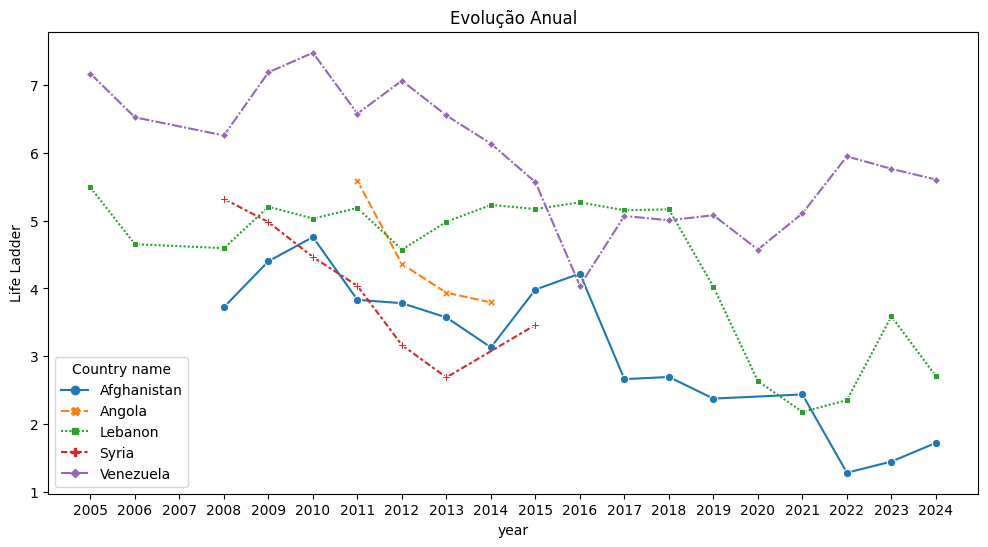

In [50]:
plt.figure(figsize=(12,6))
sns.lineplot(data=maiores_dp_felicidade['Life Ladder'],markers=True)
plt.title("Evolução Anual")
plt.ylabel(indicador)
plt.xticks(report['year'].unique())

### Variações entre dois anos consecutivos

In [51]:
report.columns

Index(['Country name', 'year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect',
       'Rank_Felicidade', 'Country_Code'],
      dtype='object')

In [52]:
report['year']=report['year'].astype('str') #converter a colunas com os anos par string

In [53]:
numeric_columns=report.select_dtypes(include=np.number).columns.to_list() #Selecionar somente colunas numéricas para as quais será calculada a diferença
numeric_columns

['Life Ladder',
 'Log GDP per capita',
 'Social support',
 'Healthy life expectancy at birth',
 'Freedom to make life choices',
 'Generosity',
 'Perceptions of corruption',
 'Positive affect',
 'Negative affect',
 'Rank_Felicidade']

In [54]:
coluna_intervalo_anos=[str(i)+'-'+str(i+1) for i in range(2005,2024,1)] #lista com intervalos entra anos sucessivos que será incluída no dataframe
coluna_intervalo_anos

['2005-2006',
 '2006-2007',
 '2007-2008',
 '2008-2009',
 '2009-2010',
 '2010-2011',
 '2011-2012',
 '2012-2013',
 '2013-2014',
 '2014-2015',
 '2015-2016',
 '2016-2017',
 '2017-2018',
 '2018-2019',
 '2019-2020',
 '2020-2021',
 '2021-2022',
 '2022-2023',
 '2023-2024']

In [55]:
variacao_anos_consecutivos=[]
for pais in report['Country name'].unique(): #selecionar cada pais presente no dataframe
    x=report.loc[report['Country name']==pais,numeric_columns] #dataframe com as colunas numéricas para um pais
    x=x.diff() #diferença entre duas rows sucessivas
    x.reset_index(drop=True,inplace=True)
    x.drop(index=0,inplace=True) #remover a primeira linha (composta somente de nan)
    x['intervalo_anos']=coluna_intervalo_anos #introduzir a coluna com o intervalo de anos
    x["Country name"]=pais #adicionar coluna com nome do pais
    first_column=x.pop("Country name") #reorganizar a ordem das dolunas
    second_column=x.pop('intervalo_anos')
    x.insert(0,"Country name",first_column)
    x.insert(1,'intervalo_anos',second_column)
    variacao_anos_consecutivos.append(x)
variacao_anos_consecutivos=pd.concat(variacao_anos_consecutivos).reset_index(drop=True)
variacao_anos_consecutivos['Rank_Felicidade']=variacao_anos_consecutivos['Rank_Felicidade']*(-1) #multiplicação por (-1) porque um diferenca positiva significa uma piora no ranking

In [90]:
#o dataframe criado tem a diferença para cada indicador entre dois anos sucessivos
variacao_anos_consecutivos

,Country name,intervalo_anos,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Rank_Felicidade
0,Afghanistan,2005-2006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,2006-2007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,2007-2008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,2008-2009,0.678188,0.158230,0.101646,0.299999,-0.039218,0.023242,-0.031651,0.067124,-0.021103,9.0
4,Afghanistan,2009-2010,0.356603,0.105254,-0.013233,0.299999,-0.078769,-0.069436,-0.143269,0.035485,0.038231,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3149,Zimbabwe,2019-2020,0.466279,-0.101705,-0.041920,0.475002,0.011395,0.053722,-0.042129,0.002224,0.110382,27.0
3150,Zimbabwe,2020-2021,-0.005224,0.060828,-0.032092,0.474998,0.024333,-0.081855,-0.031578,-0.050741,-0.104055,-4.0
3151,Zimbabwe,2021-2022,0.141641,0.013195,-0.018979,0.475002,-0.015649,0.006072,-0.004313,0.030692,-0.050332,-16.0
3152,Zimbabwe,2022-2023,0.276167,0.008517,0.027646,0.474998,0.082626,0.004098,0.004862,-0.030857,-0.012397,3.0


In [57]:
def ranking_variacao_anual(dados=variacao_anos_consecutivos,indicador='Rank_Felicidade',colunas=['Country name','intervalo_anos',indicador]):
    '''
    Função que retorna um dataframe com os paises onde ocorreram as maiores variações positivas e outro com as maiores variações negativas 
    para o indicador selecionado entre dois anos consecutivos 

    inputs
        dados     - (pandas dataframe) dataframe com diferenças entre dois anos consecutivos para os indicadores
        indicador - (str) indicador que será usado para a construção do ranking
        colunas   - (list) - colunas que serão mantidas no dataframe gerado

    outputs
        Os dataframes retornados  tem uma colunas com os nomes dos países [Country name	], outra com o intervalo de tempo em que ocorreu
        a variação do indicador [intervalo_anos] e a terceira com a variação calculada do indicador considerado
    
        variacao_positiva - pandas dataframe com os paises onde ocorreram as maiores variações positivas do indicadr selecionado
        variacao_negativa - pandas dataframe com os paises onde ocorreram as maiores variações negativas do indicadr selecionado
        
    '''
    variacao_positiva=dados.sort_values(by=indicador,ascending=False).loc[:,colunas]
    variacao_negativa=dados.sort_values(by=indicador,ascending=True).loc[:,colunas]

    variacao_positiva.rename(columns={indicador:'Variacao '+indicador},inplace=True)
    variacao_negativa.rename(columns={indicador:'Variacao '+indicador},inplace=True)

    variacao_positiva.reset_index(drop=True,inplace=True)
    variacao_negativa.reset_index(drop=True,inplace=True)

    return variacao_positiva,variacao_negativa



In [58]:
variacao_positiva,variacao_negativa=ranking_variacao_anual()


In [59]:
variacao_positiva

,Country name,intervalo_anos,Life Ladder
0,Bahrain,2012-2013,1.662524
1,Nigeria,2019-2020,1.236464
2,El Salvador,2011-2012,1.193077
3,Botswana,2011-2012,1.316018
4,Croatia,2019-2020,0.882248
...,...,...,...
3149,Yemen,2021-2022,NaN
3150,Zambia,2005-2006,NaN
3151,Zambia,2009-2010,NaN
3152,Zambia,2010-2011,NaN


In [60]:
variacao_negativa

,Country name,intervalo_anos,Life Ladder
0,El Salvador,2010-2011,-1.998616
1,Venezuela,2015-2016,-1.527686
2,Bahrain,2010-2011,-1.112893
3,Angola,2011-2012,-1.228751
4,Afghanistan,2010-2011,-0.926662
...,...,...,...
3149,Yemen,2021-2022,NaN
3150,Zambia,2005-2006,NaN
3151,Zambia,2009-2010,NaN
3152,Zambia,2010-2011,NaN


### Comparativo entre 2005 e 2024

Os dados presentes no dataset são referentes aos relatórios publicados entre os anos de 2005 e 2024. Para os ano de 2024 só estão dispioníveis os dados para Life Ladder. Será comparada então a situação dos países em 2005 com a situação em 2024

In [61]:
report_2005=report[report['year']=='2005'] #Somente anos de 2005
report_2024=report[report['year']=='2024'] #seomente ano de 2024

In [62]:
report_2005=report_2005.dropna(subset=['Life Ladder']) #manter somente os paises com dados disponíveis para o anos de 2005

In [63]:
#manter nos dados de 2024 somente os paises com dados disponiveis no anos de 2005 para possibilitar o comparativo
report_2024=report_2024[(report_2024['Country name']).isin(report_2005['Country name'].tolist())] 

In [64]:
report_2005_2024=pd.concat((report_2005,report_2024))
report_2005_2024=report_2005_2024.loc[:,['Country name','year','Life Ladder','Rank_Felicidade','Country_Code']]
report_2005_2024['year']=report_2005_2024['year'].astype('int')


In [65]:
report_2005_2024.sort_values(by=['Country name'],inplace=True)
report_2005_2024.reset_index(drop=True,inplace=True)

In [66]:
report_2005_2024

,Country name,year,Life Ladder,Rank_Felicidade,Country_Code
0,Australia,2005,7.340688,5.0,AUS
1,Australia,2024,7.056900,10.0,AUS
2,Belgium,2005,7.262290,6.0,BEL
3,Belgium,2024,6.894200,16.0,BEL
4,Brazil,2005,6.636771,13.0,BRA
5,Brazil,2024,6.272000,44.0,BRA
6,Canada,2005,7.418048,3.0,CAN
7,Canada,2024,6.899600,15.0,CAN
8,Czechia,2024,6.821800,18.0,CZE
9,Czechia,2005,6.439257,17.0,CZE


In [91]:
variacao_2005_2024=[]
for country in report_2005_2024["Country name"]:
    diff_2005_2004=report_2005_2024.loc[report_2005_2024['Country name']==country,['Life Ladder','Rank_Felicidade']].diff()
    diff_2005_2004['Country name']=country
    variacao_2005_2024.append(diff_2005_2004)
variacao_2005_2024=pd.concat(variacao_2005_2024)

In [92]:
variacao_2005_2024.dropna(inplace=True)
variacao_2005_2024.drop_duplicates(inplace=True)
variacao_2005_2024['Rank_Felicidade']=variacao_2005_2024['Rank_Felicidade']*-1
first_column=variacao_2005_2024.pop('Country name')
variacao_2005_2024.insert(0,'Country name',first_column)

In [96]:
#Países quie mais subiram no rankink no comparativo entre os anos de 2005 e 2024
variacao_2005_2024.sort_values(by='Rank_Felicidade',ascending=False)

,Country name,Life Ladder,Rank_Felicidade
29,Jordan,2.108860,107.0
37,Pakistan,0.567957,85.0
23,Iran,0.385390,78.0
27,Japan,0.456017,35.0
21,Hungary,-0.822967,32.0
25,Italy,0.530283,29.0
45,Spain,0.731886,28.0
39,Poland,-0.854291,15.0
33,Mexico,-0.097342,10.0
51,United Kingdom,0.234557,9.0
